Final Project Step 5 to end

In [142]:
import sep
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import rcParams
from astropy.visualization import hist as astropy_hist

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

importing libraries and funtions

In [143]:
f105w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

get and store file

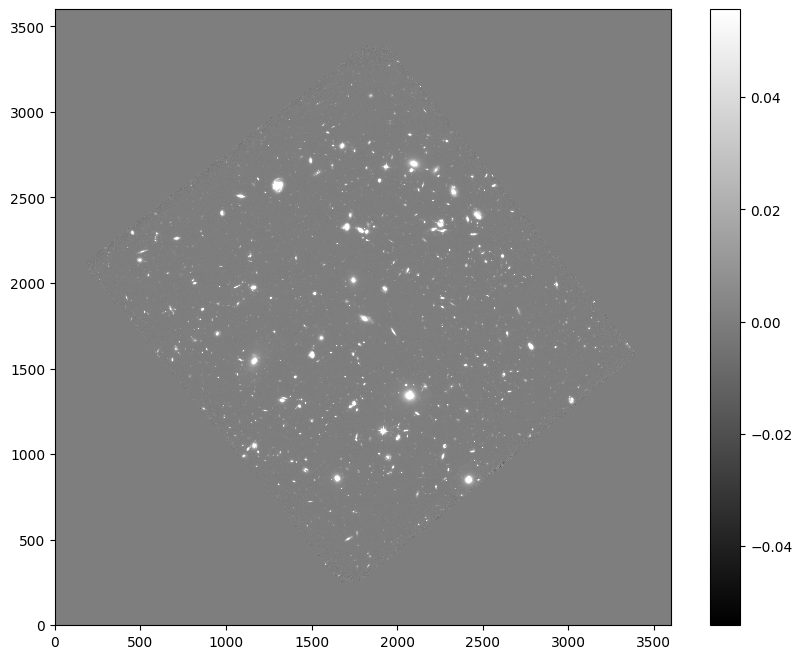

In [144]:
m, s = np.mean(f105w), np.std(f105w)
plt.imshow(f105w, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('Image1.png')
plt.show()

save and display png

In [145]:
f105w = f105w.byteswap()
f105w = f105w.view(f105w.dtype.newbyteorder("="))
f105w_bkg = sep.Background(f105w)

compute and store background

In [146]:
print(f105w_bkg.globalback)
print(f105w_bkg.globalrms)

0.0
0.0005398219218477607


global mean and noise of background

In [147]:
bkg_image = f105w_bkg.back()

retrieve background as 2d array

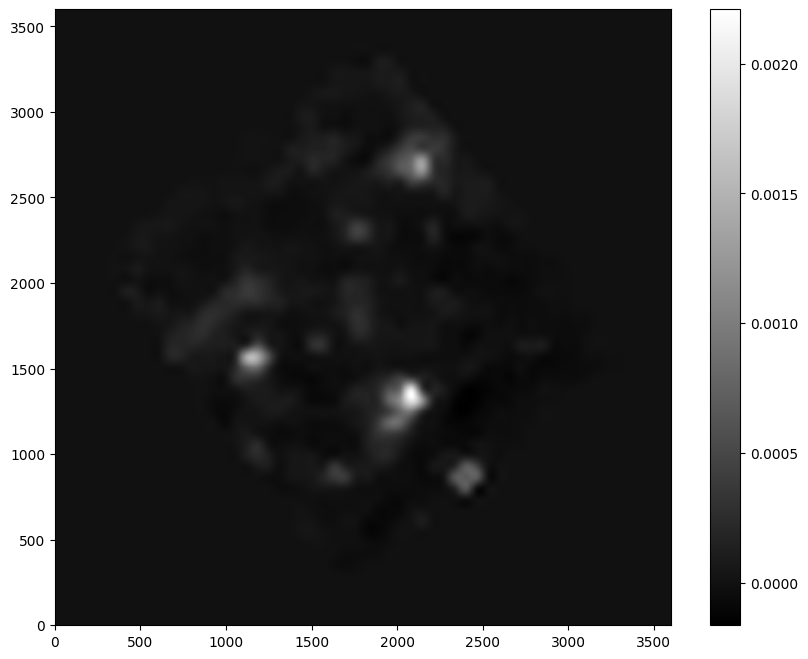

In [148]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('Image2.png')
plt.show()

save and display background 

In [149]:
bkg_rms = f105w_bkg.rms()

compute root mean square and store

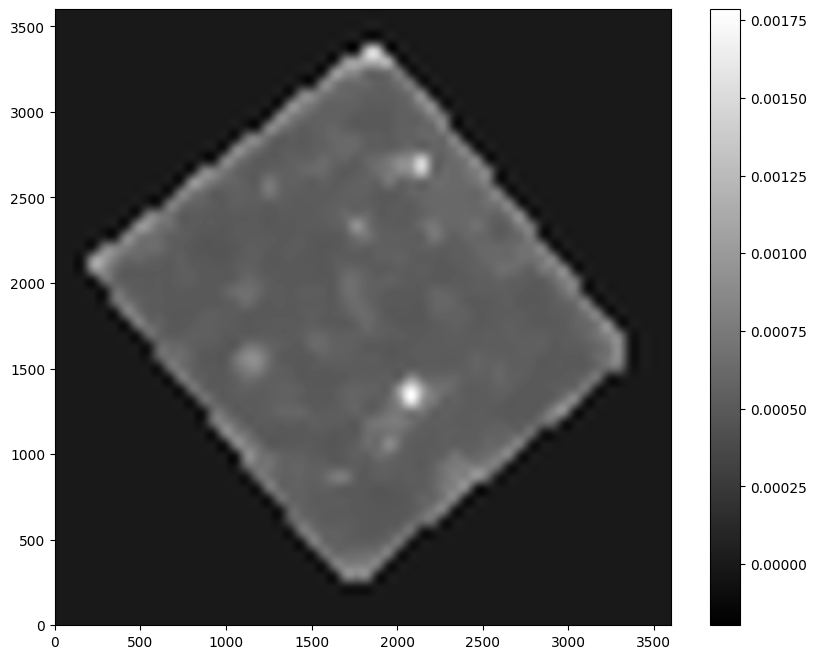

In [150]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('Image3.png')
plt.show()

save and display background noise png

In [151]:
subImage = f105w - f105w_bkg

subtract background

In [152]:
objects = sep.extract(data_sub, 1.5, err=f105w_bkg.globalrms)

get objects

In [153]:
len(objects)

8635

how many objects

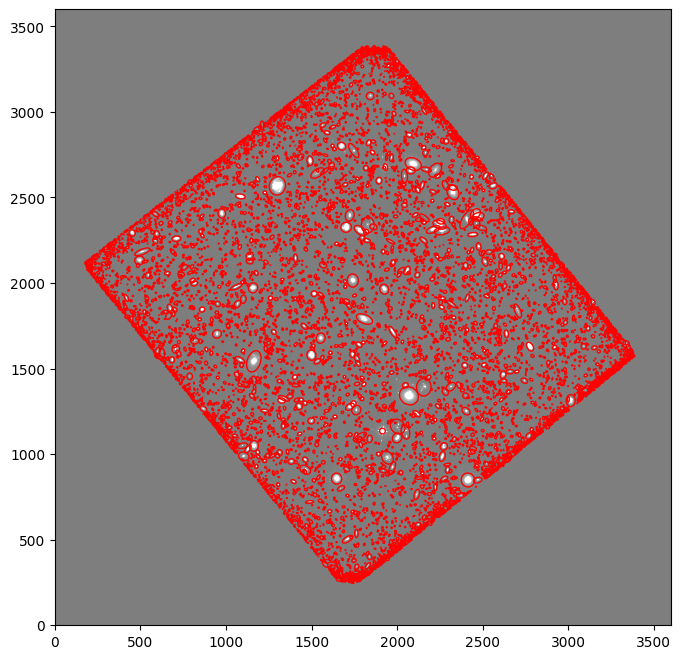

In [154]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m, s = np.mean(subImage), np.std(subImage)
im = ax.imshow(subImage, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('Image4.png')
plt.show()

plot subtracted background and circle objects

In [155]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

get fields

In [156]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=f105w_bkg.globalrms, gain=1.0)

aperture photometry

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877
The largest outlier is: 807.2972835731507

Total objects: 8635
Mean flux: 0.3621
Median flux: 0.0310
Standard Deviation: 9.2462


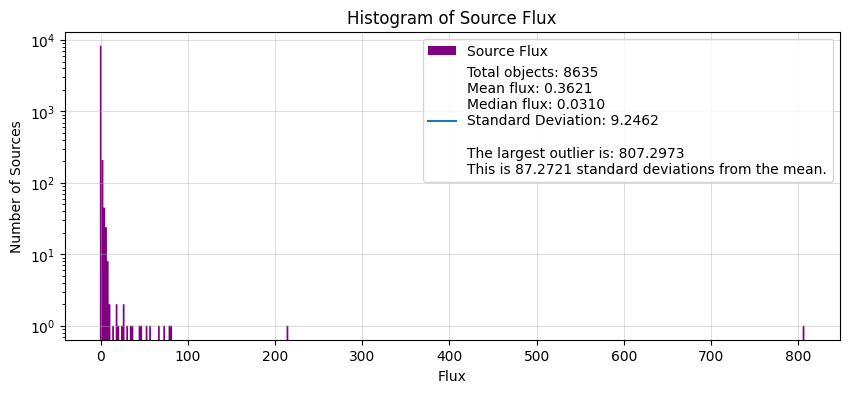

In [157]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

Q1 = np.percentile(flux, 25)
Q3 = np.percentile(flux, 75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = flux[(flux > upper_bound) | (flux < lower_bound)]

if len(outliers) > 0:
    largest_outlier = np.max(outliers)
    print(f"The largest outlier is: {largest_outlier}")
    print()
else:
    pass

fmean = np.mean(flux)
fmedian = np.median(flux)
fstd = np.std(flux)
std_from_mean = (largest_outlier-fmean) / fstd

print(f"Total objects: {len(flux)}")
print(f"Mean flux: {fmean:.4f}")
print(f"Median flux: {fmedian:.4f}")
print(f"Standard Deviation: {fstd:.4f}")

plt.figure(figsize=(10, 4))

astropy_hist(flux, bins=400, color='purple' , histtype='stepfilled', alpha=1, label='Source Flux')

plt.title("Histogram of Source Flux")
plt.xlabel("Flux")
plt.ylabel("Number of Sources")
plt.plot(1,1, label=f'Total objects: {len(flux)}\nMean flux: {fmean:.4f}\nMedian flux: {fmedian:.4f}\nStandard Deviation: {fstd:.4f}\n\nThe largest outlier is: {largest_outlier:.4f}\nThis is {std_from_mean:.4f} standard deviations from the mean.')
plt.legend()
plt.grid(True, alpha=0.4)
plt.yscale('log')
plt.savefig('fluxHistogram.png')
plt.show()

first 10 results

In [158]:
f125w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
f160w = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")

In [159]:
f125w = f125w.byteswap()
f125w = f125w.view(f125w.dtype.newbyteorder("="))

In [160]:
f160w = f160w.byteswap()
f160w = f160w.view(f160w.dtype.newbyteorder("="))

In [161]:
f125w_bkg = sep.Background(f125w)
f160w_bkg = sep.Background(f160w)

In [162]:
f105w -= f105w_bkg
f125w -= f125w_bkg
f160w -= f160w_bkg

In [163]:
median_f105w = np.nanmedian(f105w[f105w<1])
median_f125w = np.nanmedian(f125w[f125w<1])
median_f160w = np.nanmedian(f160w[f160w<1])

In [164]:
print(f'Median of F105W sky {median_f105w}')
print(f'Median of F125W sky {median_f125w}')
print(f'Median of F160W sky {median_f160w}')

Median of F105W sky 1.293391096651404e-22
Median of F125W sky 7.127440320205985e-22
Median of F160W sky 2.268324725663603e-21


In [165]:
def rescale_data(data,dmin=.001,dmax=10.):
    datac = np.clip(data,dmin,dmax)
    return (np.log10(datac)-np.log10(dmin))/(np.log10(dmax)-np.log10(dmin))

In [166]:
p_f105w = rescale_data(f105w)
p_f125w = rescale_data(f125w)
p_f160w = rescale_data(f160w)

In [167]:
rgb = np.stack([p_f160w,p_f125w,p_f105w],axis=-1)
print(rgb.shape)

(3600, 3600, 3)


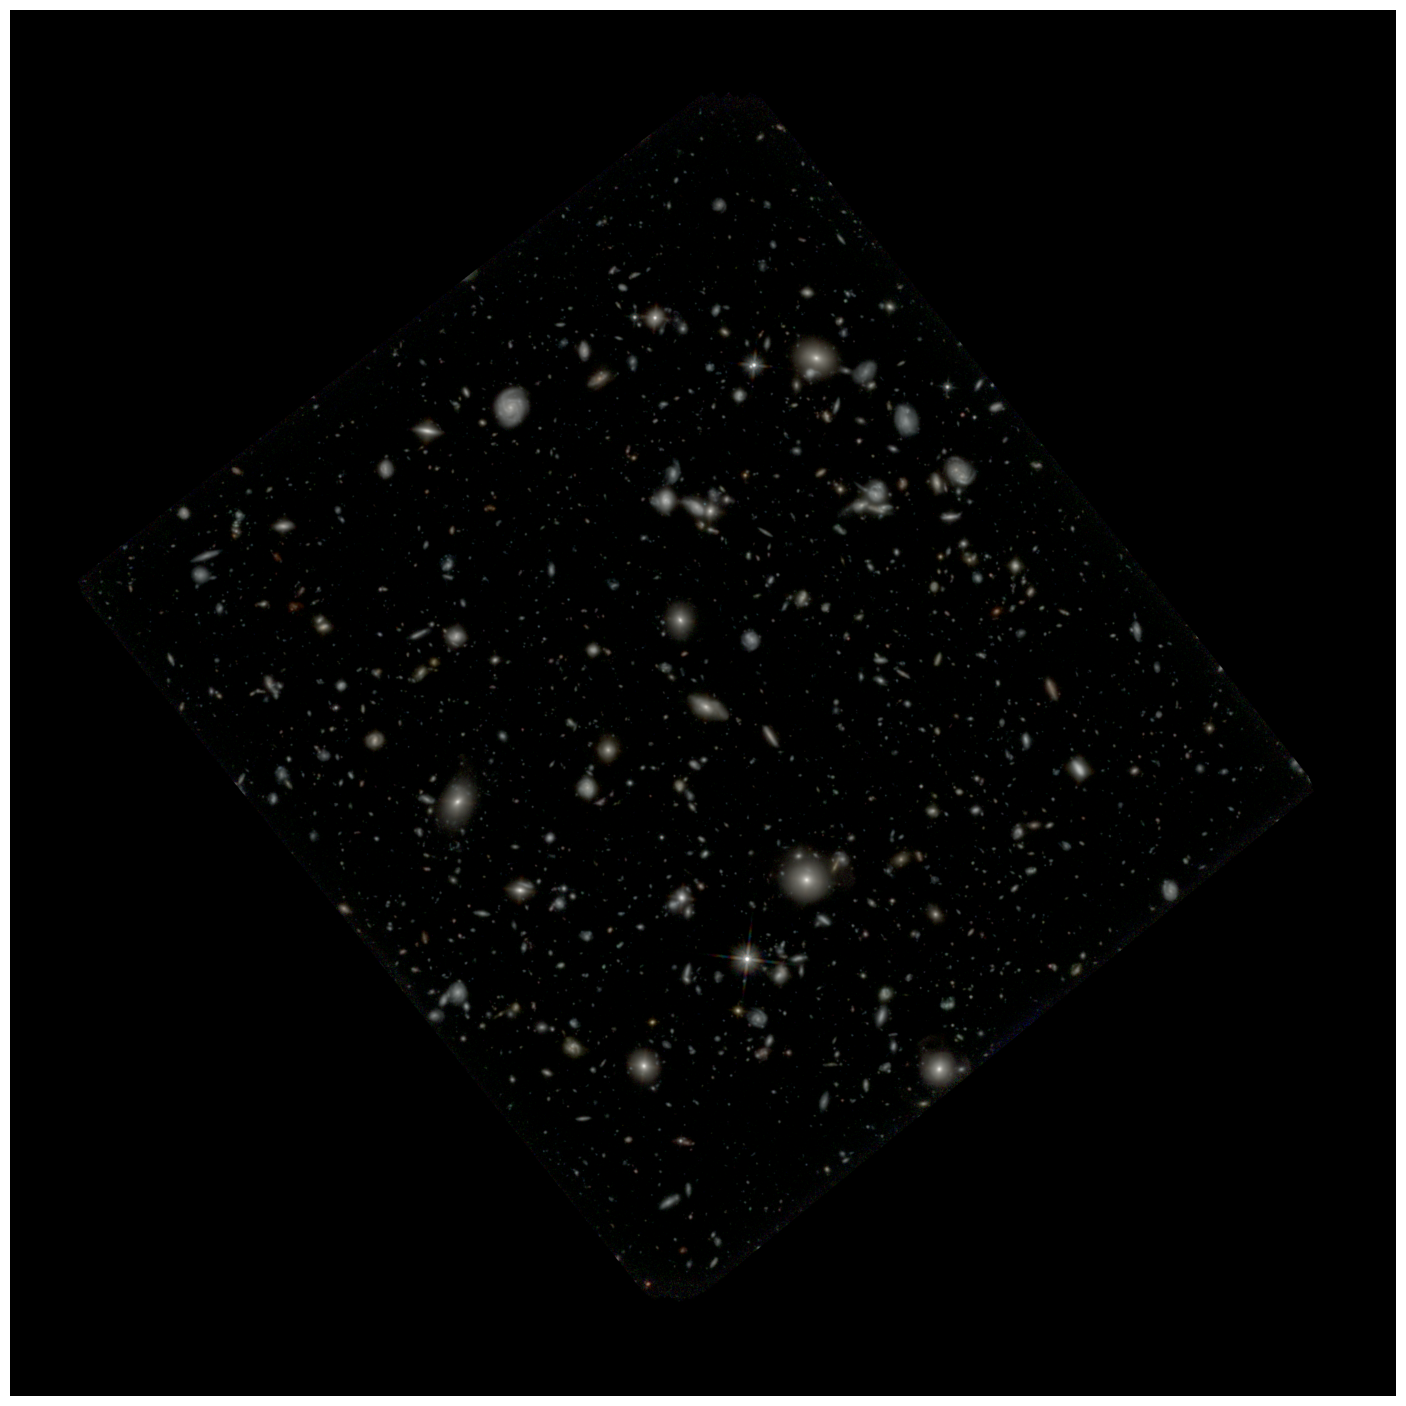

In [168]:
xsize = rgb.shape[1]
ysize = rgb.shape[0]
f,ax = plt.subplots(1,1,figsize=(18,18))
ax.axis('off')
ax.imshow(rgb,origin='lower')
plt.savefig("rgbImage.png",bbox_inches='tight',pad_inches=0,dpi=600)
plt.show()